In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pow
from skfuzzy import control as ctrl
import os

In [2]:
# Create directory to store plots.
if not os.path.exists('./img'):
    os.makedirs('./img')

In [3]:
# Example of the solution.
def xf(v0, u):
    return (pow(v0, 2) / (2 * u * 9.81))

In [4]:
# Generation of the space.
v0 = np.linspace(1, 5, 200)

In [5]:
# Compute solution for visualization.
xf_v = np.vectorize(xf)
y0 = xf_v(v0, 0.1)
y1 = xf_v(v0, 0.2)
y2 = xf_v(v0, 0.3)

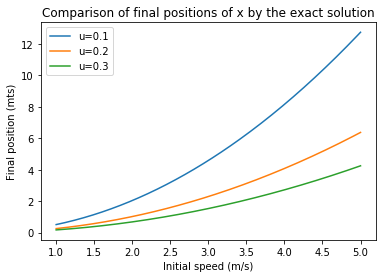

In [6]:
# Plot solution.
plt.title("Comparison of final positions of x by the exact solution")
plt.xlabel("Initial speed (m/s)")
plt.ylabel("Final position (mts)")
plt.plot(v0, y0, label="u=0.1")
plt.plot(v0, y1, label="u=0.2")
plt.plot(v0, y2, label="u=0.3")
plt.legend()
plt.savefig('./img/exact_sol_curve.png')

In [7]:
# Create membership functions.
v_input = ctrl.Antecedent(np.arange(1, 6, 1), 'v_input')
u_input = ctrl.Antecedent(np.arange(0.1, 0.4, 0.05), 'u_input')
pos_output = ctrl.Consequent(np.arange(0.1, 13.0, 0.2), 'pos_output')

# Use the auto membership function population.
v_input.automf(3)
u_input.automf(3)
pos_output.automf(3)

/home/jamirl/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


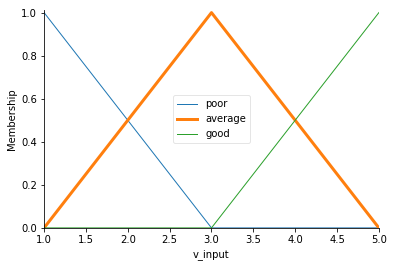

In [8]:
# Visualize the triangles.
v_input['average'].view()
plt.savefig('./img/v_input.png')

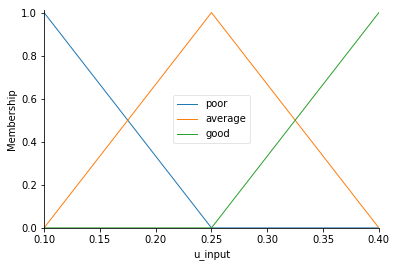

In [9]:
u_input.view()
plt.savefig('./img/u_input.png')

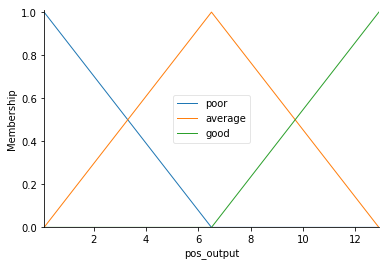

In [10]:
pos_output.view()
plt.savefig('./img/pos_output.png')

In [11]:
# Create rules for the "poor" position.
rule1 = ctrl.Rule(v_input['poor'], pos_output['poor'])
rule2 = ctrl.Rule(v_input['average'] & (u_input['average'] | u_input['good']), pos_output['poor'])

# Create rules for an "average" position.
rule3 = ctrl.Rule(v_input['average'] & u_input['poor'], pos_output['average'])
rule4 = ctrl.Rule(v_input['good'] & (u_input['average'] | u_input['good']), pos_output['average'])

# Create a final rule for the "good" position.
rule5 = ctrl.Rule(v_input['good'] & (u_input['poor']), pos_output['good'])

In [12]:
# Create control system.
position_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

In [13]:
position = ctrl.ControlSystemSimulation(position_control)

In [14]:
# Store the results of the u = 0.1, 0.2, 0.3 for plotting with fuzzy controller.
y0_dif = []
y1_dif = []
y2_dif = []

for elem in v0:
    position.input['v_input'] = elem
    position.input['u_input'] = 0.1
    position.compute()
    y0_dif.append(position.output['pos_output'])

    position.input['v_input'] = elem
    position.input['u_input'] = 0.2
    position.compute()
    y1_dif.append(position.output['pos_output'])

    position.input['v_input'] = elem
    position.input['u_input'] = 0.3
    position.compute()
    y2_dif.append(position.output['pos_output'])

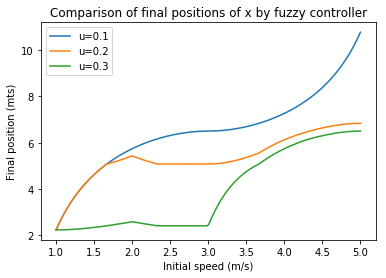

In [15]:
# Plot the fuzzy controller predictor.
plt.title("Comparison of final positions of x by fuzzy controller")
plt.xlabel("Initial speed (m/s)")
plt.ylabel("Final position (mts)")
plt.plot(v0, y0_dif, label="u=0.1")
plt.plot(v0, y1_dif, label="u=0.2")
plt.plot(v0, y2_dif, label="u=0.3")
plt.legend()
plt.savefig('./img/fuzzy_predictor_curve.png')